In [1]:
import numpy as np
import ast

import pandas as pd

In [2]:
df = pd.read_csv ('android_dataset.csv')

In [4]:
file1 = open("Mazlan_weighted.txt","r")
print("Output of Readlines after writing") 
#print(type(file1.readlines()))
a=file1.readlines()
feat=[]
for line in a:
    feat.append(line.strip('\n').replace(" ", "_"). upper() )

Output of Readlines after writing


In [ ]:
feat

['ACCESS_COARSE_LOCATION',
 'ACCESS_FINE_LOCATION',
 'CALL_PHONE',
 'CAMERA',
 'GET_ACCOUNTS',
 'READ_PHONE_STATE',
 'RECORD_AUDIO',
 'SEND_SMS',
 'WRITE_EXTERNAL_STORAGE',
 'PROCESS_OUTGOING_CALLS']

In [6]:
#X=df.loc[:, df.columns != 'label']
X=df.loc[:,feat]
X

,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,CALL_PHONE,CAMERA,GET_ACCOUNTS,READ_PHONE_STATE,RECORD_AUDIO,SEND_SMS,WRITE_EXTERNAL_STORAGE,PROCESS_OUTGOING_CALLS
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12029,1,1,1,1,1,1,1,1,1,1
12030,0,0,0,0,0,1,0,0,0,0
12031,0,0,0,1,0,0,0,0,0,0
12032,0,0,0,0,0,0,0,0,0,0


In [7]:
Y=df.loc[:,'label']
Y

0        0
1        0
2        0
3        0
4        0
        ..
12029    1
12030    1
12031    1
12032    1
12033    1
Name: label, Length: 12034, dtype: int64

In [8]:
size=[0.1,0.2,0.3,0.4]
random_forest_acc=[]
random_forest_pre=[]
random_forest_recall=[]
random_forest_f1=[]
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=RandomForestClassifier(n_estimators=35)

#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy: ",s, ' ' ,metrics.accuracy_score(y_test, y_pred))
    a=max(a,metrics.accuracy_score(y_test, y_pred))
    
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    print(f1_score(y_test, y_pred, average=None))
    random_forest_acc.append(metrics.accuracy_score(y_test, y_pred))
    random_forest_pre.append(precision_score(y_test, y_pred, average="macro"))
    random_forest_recall.append(recall_score(y_test, y_pred, average="macro"))

    random_forest_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  0.203125
memory (128186, 1470151)
Accuracy:  0.1   0.9053156146179402
0.9052486828589417
0.9057739669798412
0.9051289481309766
[0.90776699 0.90273038]
time  0.234375
memory (1457327, 2664109)
Accuracy:  0.2   0.9027835479850437
0.9025121505421012
0.9035956511058898
0.9020367183017786
[0.90765588 0.89736842]
time  0.21875
memory (1479676, 2807795)
Accuracy:  0.3   0.9025200775408474
0.9024903968837973
0.9031867895545316
0.9025945859055865
[0.90419162 0.90078918]
time  0.234375
memory (1501327, 2839376)
Accuracy:  0.4   0.9056917324470295
0.9055626189132984
0.9061228155420445
0.9053238118264715
[0.90905449 0.90207075]


In [9]:
size=[0.1,0.2,0.3,0.4]
nb_acc=[]
nb_pre=[]
nb_recall=[]
nb_f1=[]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=GaussianNB()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    nb_acc.append(metrics.accuracy_score(y_test, y_pred))
    nb_pre.append(precision_score(y_test, y_pred, average="macro"))
    nb_recall.append(recall_score(y_test, y_pred, average="macro"))
    nb_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.834717607973422
0.833546267059882
0.8366524830636582
0.8326087016647168
Accuracy: 0.8442044038221853
0.8428187155827187
0.8475540639107378
0.8416290078132029
Accuracy: 0.8435336471891443
0.8419628898254269
0.8477107564754349
0.8406667224272586
Accuracy: 0.8329871208973826
0.8319510073762646
0.8368116992175432
0.8314456674197984


In [10]:
size=[0.1,0.2,0.3,0.4]
k_acc=[]
k_pre=[]
k_recall=[]
k_f1=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    k_acc.append(metrics.accuracy_score(y_test, y_pred))
    k_pre.append(precision_score(y_test, y_pred, average="macro"))
    k_recall.append(recall_score(y_test, y_pred, average="macro"))
    k_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8903654485049833
0.8900146159978741
0.8918267093447141
0.889471939902784
Accuracy: 0.8537598670544246
0.8529282291202329
0.8571976581406657
0.8522833123265559
Accuracy: 0.8690113541955137
0.8689919029007733
0.8695794445621696
0.8691953019397108
Accuracy: 0.9038221852928957
0.9036370612719586
0.9043322112437909
0.9033152702687761


In [11]:
size=[0.1,0.2,0.3,0.4]
s_acc=[]
s_pre=[]
s_recall=[]
s_f1=[]
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import tracemalloc
import os
import psutil
 
import time

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=SVC(kernel ='rbf', random_state = 1) 
#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())
 
    # stopping the library
    tracemalloc.stop()
    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    s_acc.append(metrics.accuracy_score(y_test, y_pred))
    s_pre.append(precision_score(y_test, y_pred, average="macro"))
    s_recall.append(recall_score(y_test, y_pred, average="macro"))
    s_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  2.65625
memory (2034983, 4179983)
Accuracy: 0.9061461794019934
0.905935353890126
0.9068853340279259
0.9055402121078215
time  2.109375
memory (206047, 1689229)
Accuracy: 0.9073535521395929
0.9073304553274617
0.9075620759696563
0.9072947520315942
time  1.796875
memory (178707, 1486517)
Accuracy: 0.8983661035724176
0.8983000887815744
0.8988452130732452
0.89820354137598
time  1.046875
memory (156343, 1284349)
Accuracy: 0.9019526381387619
0.901762119032314
0.9025218249844107
0.9014309829452565


In [12]:
size=[0.1,0.2,0.3,0.4]
d_acc=[]
d_pre=[]
d_recall=[]
d_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=tree.DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    d_acc.append(metrics.accuracy_score(y_test, y_pred))
    d_pre.append(precision_score(y_test, y_pred, average="macro"))
    d_recall.append(recall_score(y_test, y_pred, average="macro"))
    d_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9019933554817275
0.9015366361446318
0.903475956667446
0.900732041755131
Accuracy: 0.9106771915247196
0.9104395032910353
0.9114286427775689
0.9099827882960413
Accuracy: 0.9086125726945444
0.9085410219569702
0.9091436633051688
0.9084083171952354
Accuracy: 0.8998753635230577
0.8996341521439168
0.8998727254345547
0.8994484164974239


In [13]:
size=[0.1,0.2,0.3,0.4]
lr_acc=[]
lr_pre=[]
lr_recall=[]
lr_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    lr_acc.append(metrics.accuracy_score(y_test, y_pred))
    lr_pre.append(precision_score(y_test, y_pred, average="macro"))
    lr_recall.append(recall_score(y_test, y_pred, average="macro"))
    lr_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8945182724252492
0.8944861731674918
0.8944982237642948
0.8944753577106519
Accuracy: 0.8944744495222269
0.8941414517791249
0.895385892058554
0.8936146752205293
Accuracy: 0.9019662143450567
0.9019653046199153
0.9022551303179002
0.9021736729227455
Accuracy: 0.8919817199833818
0.8919812538749494
0.8930118629963535
0.893125981726068


In [14]:

import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
#t = ['10%','20%','SVM','Naive Bayes','Decision tree']
t = ['10%','20%','30%','40%']
x_axis = np.arange(len(t))
ind = np.arange(len(t)) 
width = 0.1

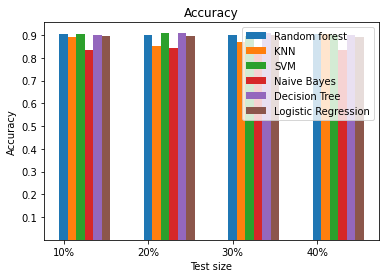

In [16]:
plt.bar(ind, random_forest_acc, width, label = 'Random forest')
plt.bar(ind+width, k_acc, width, label = 'KNN')
plt.bar(ind+width*2, s_acc, width, label = 'SVM')
plt.bar(ind+width*3, nb_acc, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_acc, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_acc, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
# Display

#plt.show()
plt.savefig('Mazlan_weighted/acc.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

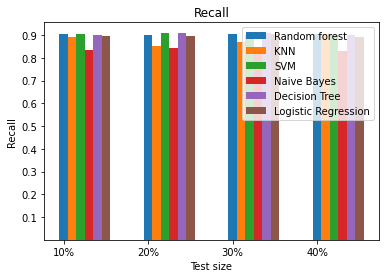

In [17]:
plt.bar(ind, random_forest_recall, width, label = 'Random forest')
plt.bar(ind+width, k_recall, width, label = 'KNN')
plt.bar(ind+width*2, s_recall, width, label = 'SVM')
plt.bar(ind+width*3, nb_recall, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_recall, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_recall, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall")
# Display

#plt.show()
plt.savefig('Mazlan_weighted/recall.png',facecolor=(1, 1, 1),dpi=200)

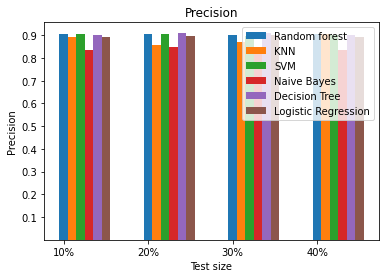

In [18]:
plt.bar(ind, random_forest_pre, width, label = 'Random forest')
plt.bar(ind+width, k_pre, width, label = 'KNN')
plt.bar(ind+width*2, s_pre, width, label = 'SVM')
plt.bar(ind+width*3, nb_pre, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_pre, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_pre, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision")
# Display

#plt.show()
plt.savefig('Mazlan_weighted/Precision.png',facecolor=(1, 1, 1),dpi=200)

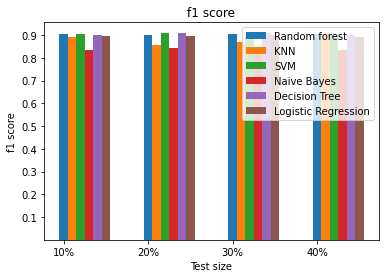

In [19]:
plt.bar(ind, random_forest_f1, width, label = 'Random forest')
plt.bar(ind+width, k_f1, width, label = 'KNN')
plt.bar(ind+width*2, s_f1, width, label = 'SVM')
plt.bar(ind+width*3, nb_f1, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_f1, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_f1, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("f1 score")
plt.legend()
plt.title("f1 score")
# Display

#plt.show()
plt.savefig('Mazlan_weighted/f1_score.png',facecolor=(1, 1, 1),dpi=200)

In [20]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_acc)
per_22.append(k_acc)
per_22.append(s_acc)
per_22.append(nb_acc)
per_22.append(d_acc)
per_22.append(lr_acc)
df_acc = pd.DataFrame(per_22)
df_acc=df_acc.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_acc.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_acc.to_csv('Mazlan_weighted/acc.csv')


In [21]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_recall)
per_22.append(k_recall)
per_22.append(s_recall)
per_22.append(nb_recall)
per_22.append(d_recall)
per_22.append(lr_recall)
df_recall = pd.DataFrame(per_22)
df_recall=df_recall.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_recall.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_recall.to_csv('Mazlan_weighted/recall.csv')


In [22]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_pre)
per_22.append(k_pre)
per_22.append(s_pre)
per_22.append(nb_pre)
per_22.append(d_pre)
per_22.append(lr_pre)
df_pre = pd.DataFrame(per_22)
df_pre=df_pre.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_pre.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_pre.to_csv('Mazlan_weighted/pre.csv')


In [23]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_f1)
per_22.append(k_f1)
per_22.append(s_f1)
per_22.append(nb_f1)
per_22.append(d_f1)
per_22.append(lr_f1)
df_f1 = pd.DataFrame(per_22)
df_f1=df_f1.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_f1.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_f1.to_csv('Mazlan_weighted/f1.csv')
